# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [166]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import stats

In [167]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [168]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


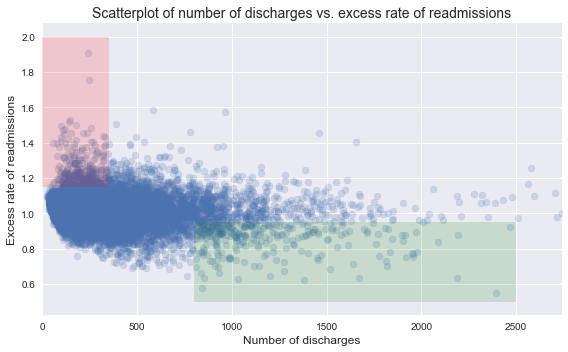

In [169]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [170]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [171]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


### A. Do you agree with the above analysis and recommendations? Why or why not?

I don't agree with the above analysis for the following reasons:

* **Data Wrangling:** the preliminary analysis deals with some of the missing information (missing values under Number of Discharges column) but not all missing values are addresssed. This analysis would benefit if the original author had taken the time to clean the other fields, which as you can see below, still has missing data in the dataset.

* **Analysis:** From what I can tell, this report bases it's entire analysis from a single scatterplot. The report doesn't provide any statistical analysis to support its finding that there is a "significant correlation between hospital capacity (number of discharges) and readmission rates." Also, the author makes a recommendation for hospitals with "small capacity of less than 300", however, their original analysis looks at hospitals with less than 100 dischrages or more than 1000, making it difficul tto understand why they are making a recommendation for a hospital with a capacity of less than 300.

In [172]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for α  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.

### Clean the Data

In [173]:
# Rename columns
colnames = ['hospital_name', 'provider_number', 'state', 'meaure_name','number_of_discharges', 'footnote',\
            'excess_readmission_ratio', 'predicted_readmission_rate', 'expected_readmission_rate',\
            'number_of_readmissions', 'start_date', 'end_date']
hospital_read_df.columns = colnames

# Clean the data
hospital_read_df['number_of_readmissions'] = hospital_read_df['number_of_readmissions'].fillna('missing value')
df_clean = hospital_read_df[hospital_read_df['number_of_readmissions'] != 'missing value']

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
hospital_name                 11497 non-null object
provider_number               11497 non-null int64
state                         11497 non-null object
meaure_name                   11497 non-null object
number_of_discharges          11497 non-null object
footnote                      0 non-null float64
excess_readmission_ratio      11497 non-null float64
predicted_readmission_rate    11497 non-null float64
expected_readmission_rate     11497 non-null float64
number_of_readmissions        11497 non-null object
start_date                    11497 non-null object
end_date                      11497 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


### 1. Setup an appropriate hypothesis test.

**Null hypothesis $H_{O}$ is:** There is no correlation between hospital capacity (number of discharges) and readmission rates.

**Alternate hypothesis is $H_{A}$ is:** There is a significant correlation between hospital capacity (number of discharges) and reasmission rates.

### 2. Compute and report the observed significance value (or p-value)

In [180]:
t, pvalue = stats.ttest_ind(df_clean['number_of_discharges'], df_clean['excess_readmission_ratio'])
print('P-value is:', pvalue)

# Calculate Pearson R:
pearsonr = np.corrcoef(df_clean['number_of_discharges'], df_clean['excess_readmission_ratio'])[0, 1]
print('Pearson R is:', pearsonr)

P-value is: 0.0
Pearson R is: -0.0973979435108


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


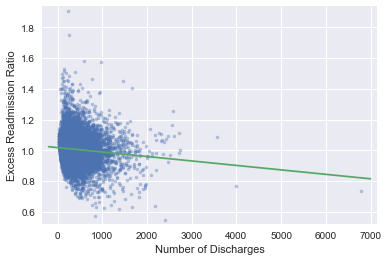

In [177]:
# Prep Data for linear regression
df_clean['number_of_discharges'] = pd.to_numeric(df_clean['number_of_discharges'])

# Plot scatter plot
_ = plt.plot(df_clean['number_of_discharges'], df_clean['excess_readmission_ratio'], marker='.',\
             linestyle='none', alpha=0.4)

# Plot regression line
a, b = np.polyfit(df_clean['number_of_discharges'], df_clean['excess_readmission_ratio'], 1)
x = np.array([-200,7000])
y = a*x + b
_ = plt.plot(x, y)

# Labels
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
plt.margins(0.02)

plt.show()

### 3. Report statistical significance for α  = .01
Given the p-value is 0.0, the statiscal significance is the same as when α = .05

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The p-value and the pearson correlation show that the $H_{O}$ can be rejected.

Given the pearson r is so close to zero, one cannot say there is a strong correlation between the two. Given this correlation, we can see that although there is a statistical significance between the two, practically, there isn't much of a correlation at all.

Given the lack of, or weak practical significance, I would recommend the client not require smaller hospitals to upgrade resource allocaiton for quality care to continue operation. 

### 5. Look at the scatterplot above. 
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.
    
In the original scatterplot above, the relationship between discharges adn excess readmission ratio is not very clear. The addition of a regression on my plot clearly shows the negative correlation between the two observations.

The plot below displays the relationship while also making it clear which hopitals are large and which hospitals are small.

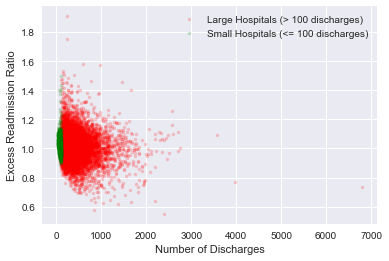

In [190]:
large = df_clean[df_clean['number_of_discharges'] > 100]
small = df_clean[df_clean['number_of_discharges'] <= 100]

a_large, b_large = np.polyfit(large['number_of_discharges'], large['excess_readmission_ratio'],1)
a_small, b_small = np.polyfit(small['number_of_discharges'], small['excess_readmission_ratio'],1)

x = np.array([-500, 7000])
y_large = a_large*x + b_large
y_small = a_small*x + b_small

_ = plt.plot(large['number_of_discharges'], large['excess_readmission_ratio'], marker='.', linestyle='none', alpha=0.2, color='red')
_ = plt.plot(small['number_of_discharges'], small['excess_readmission_ratio'], marker='.', linestyle='none', alpha=0.2, color='green')

_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.legend(['Large Hospitals (> 100 discharges)', 'Small Hospitals (<= 100 discharges)'], loc='upper right')
plt.show()